In [ ]:
import pandas as pd
import numpy as np
import statistics as stats
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import warnings
import sklearn
warnings.filterwarnings('ignore')

from datetime import datetime as dt
import regex as re

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (20, 10)
rcParams['axes.spines.right'] = True
rcParams['axes.spines.top'] = True
rcParams['axes.spines.bottom'] = True
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Kerja/Rakamin Bootcamp/Final Project/Dataset/general_data.csv')
df_employee_survey = pd.read_csv('/content/drive/MyDrive/Kerja/Rakamin Bootcamp/Final Project/Dataset/employee_survey_data.csv')
df_manager_survey = pd.read_csv('/content/drive/MyDrive/Kerja/Rakamin Bootcamp/Final Project/Dataset/manager_survey_data.csv')
df_in_time = pd.read_csv('/content/drive/MyDrive/Kerja/Rakamin Bootcamp/Final Project/Dataset/in_time.csv')
df_out_time = pd.read_csv('/content/drive/MyDrive/Kerja/Rakamin Bootcamp/Final Project/Dataset/out_time.csv')

In [ ]:
pd.set_option('display.max_columns', None)

# EDA

## df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,Y,14,8,1,10.0,2,9,7,8


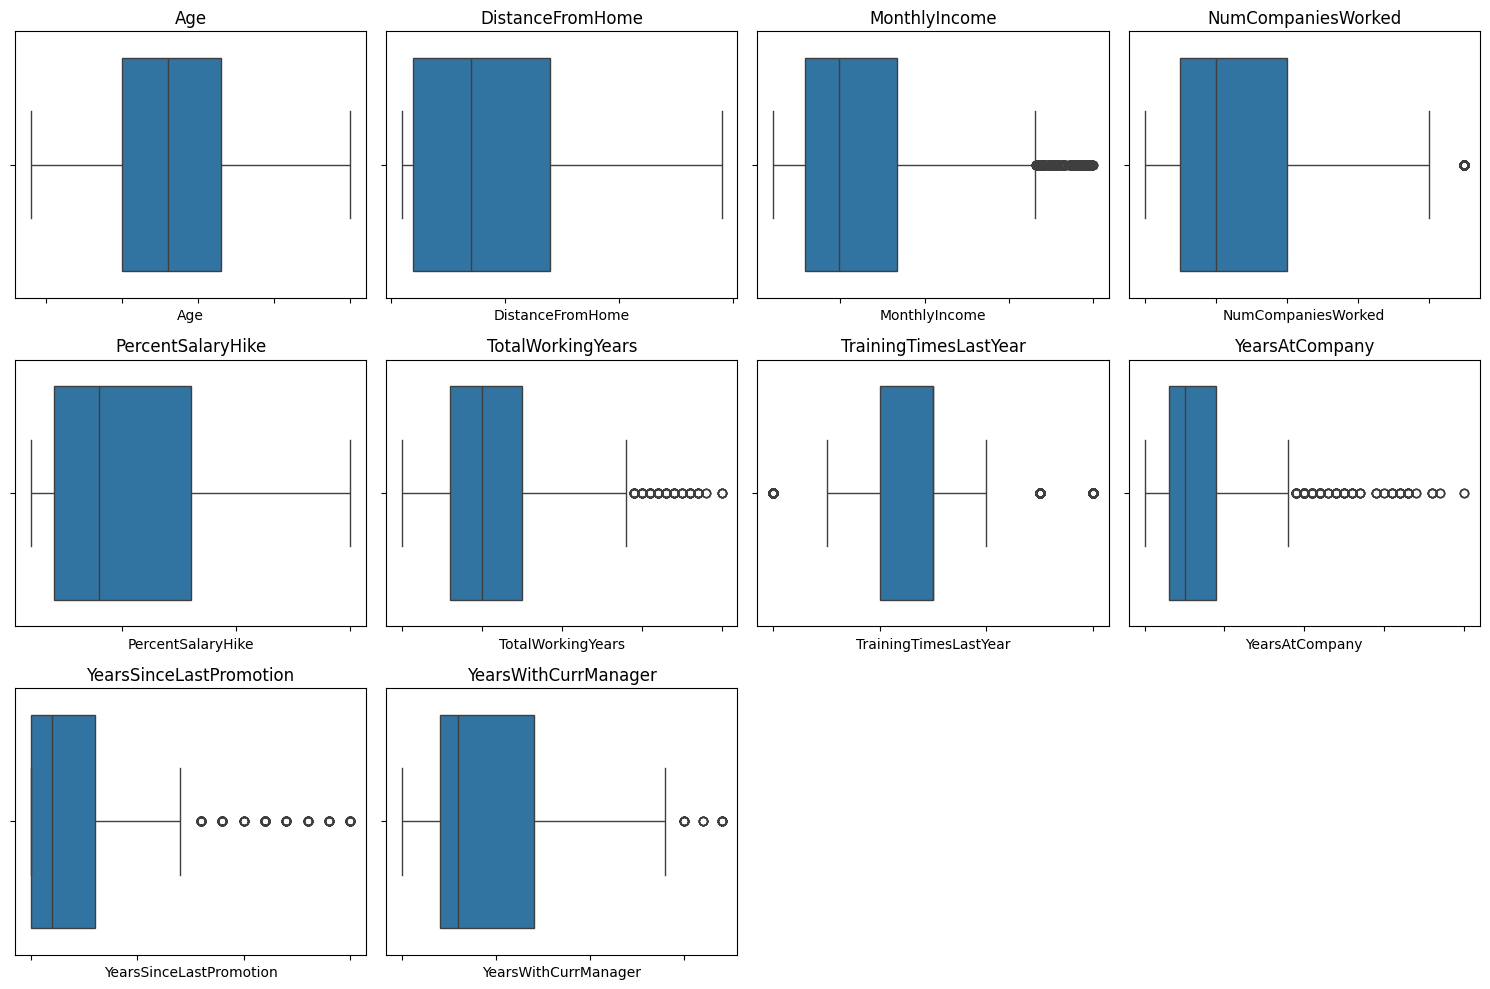

In [ ]:
num_columns = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
                   'PercentSalaryHike', 'TotalWorkingYears',
                   'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
                   'YearsWithCurrManager']

plt.figure(figsize=(15, 10))

for i, column in enumerate(num_columns, 1):
  plt.subplot(3, 4, i)
  sns.boxplot(x=df[column])
  plt.title(column)
  plt.xticks(visible=False)
  plt.tight_layout()

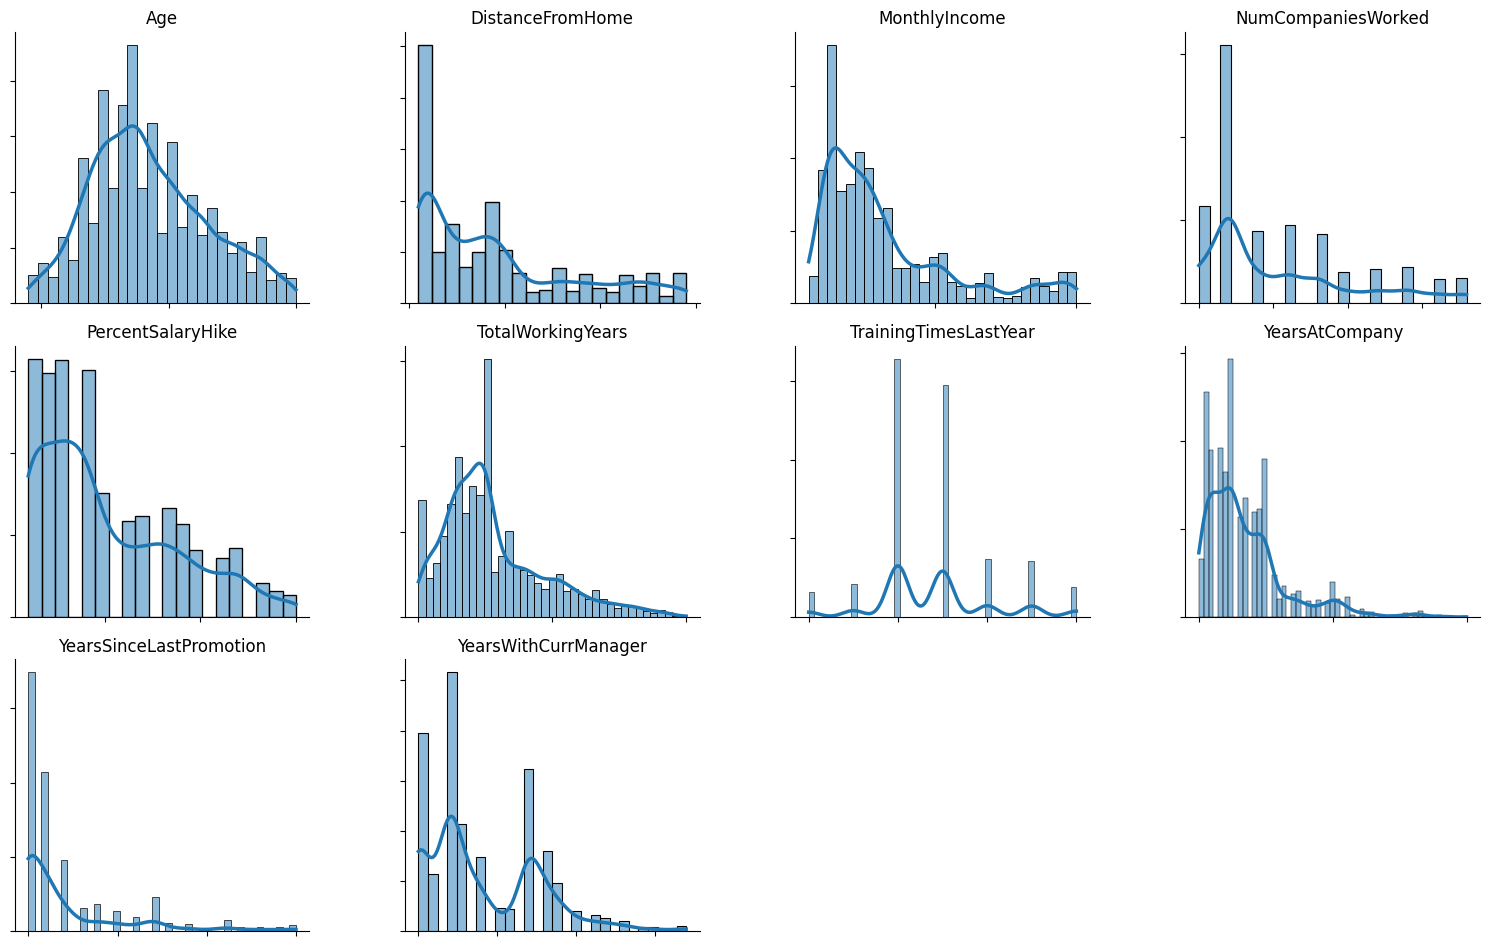

In [ ]:
# normality graph
plt.figure(figsize=(15, 10))

for i, column in enumerate(num_columns, 1):
  plt.subplot(3, 4, i)
  sns.histplot(x=df[column], kde=True)
  plt.title(column)
  plt.tight_layout()
  plt.xticks(visible=False)
  plt.yticks(visible=False)
  plt.xlabel('')
  plt.ylabel('')
  plt.grid(False)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  # plt.gca().spines['bottom'].set_visible(False)
  # plt.gca().spines['left'].set_visible(False)

plt.show()


In [ ]:
cat_columns = df.columns[~df.columns.isin(num_columns) & ~df.columns.isin(['EmployeeID'])]
cat_columns

Index(['Attrition', 'BusinessTravel', 'Department', 'Education',
       'EducationField', 'EmployeeCount', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'Over18', 'StandardHours', 'StockOptionLevel'],
      dtype='object')

In [ ]:
df[cat_columns].astype('category').describe()

,Attrition,BusinessTravel,Department,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,Over18,StandardHours,StockOptionLevel
count,4410,4410,4410,4410,4410,4410,4410,4410,4410,4410,4410,4410,4410
unique,2,3,3,5,6,1,2,5,9,3,1,1,4
top,No,Travel_Rarely,Research & Development,3,Life Sciences,1,Male,1,Sales Executive,Married,Y,8,0
freq,3699,3129,2883,1716,1818,4410,2646,1629,978,2019,4410,4410,1893


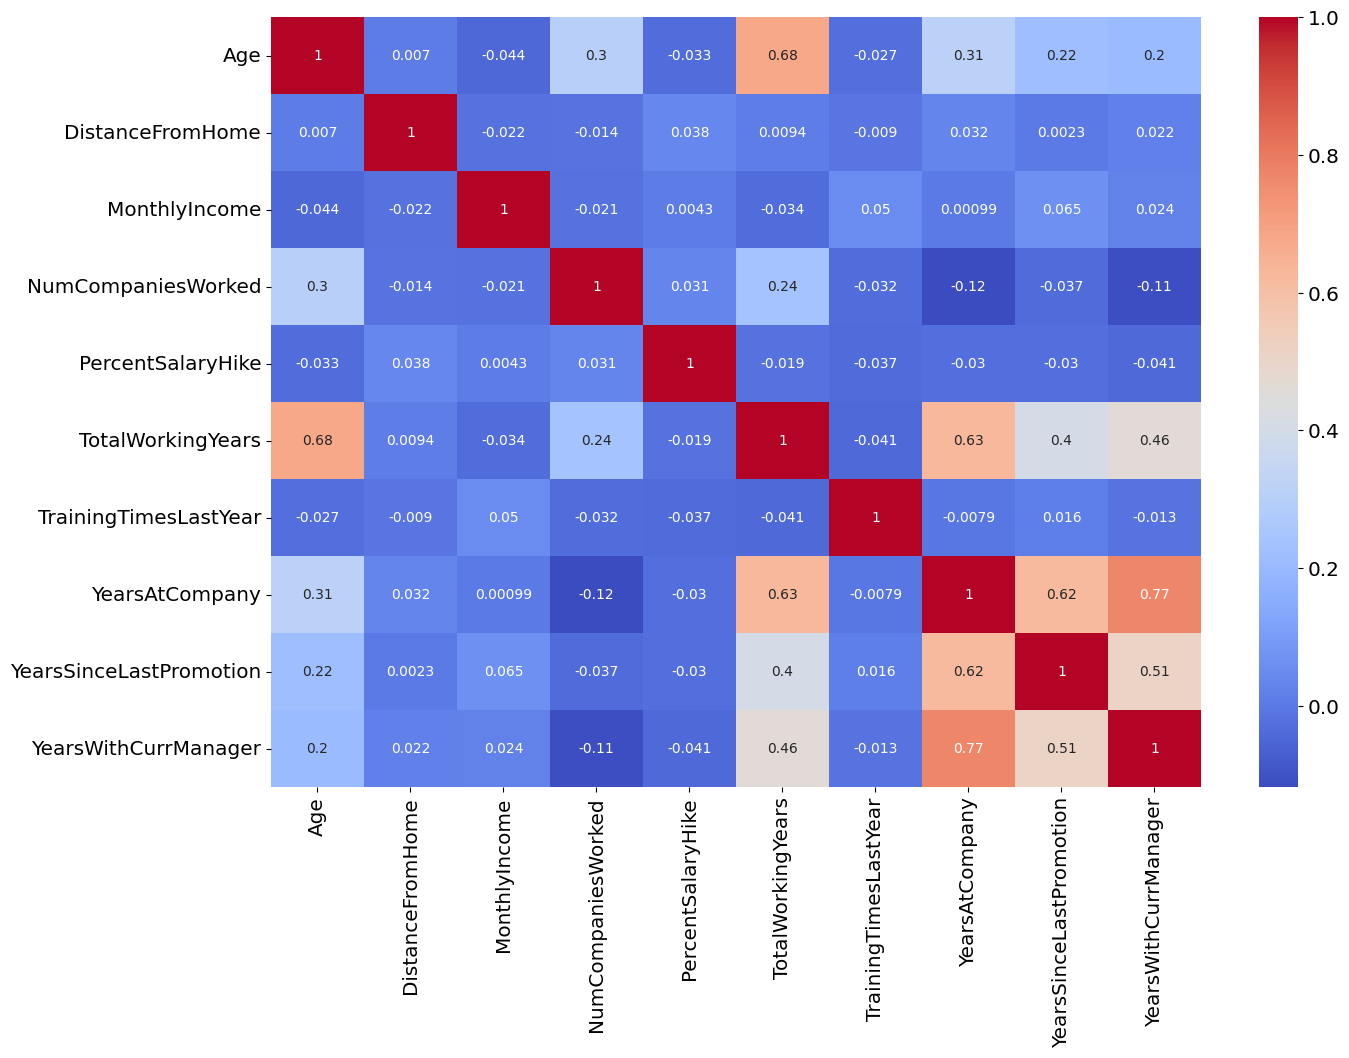

In [ ]:
# heatmap correlation
plt.figure(figsize=(15, 10))
sns.heatmap(df[num_columns].corr(), annot=True, cmap='coolwarm')
plt.show()

## df_employee_survey

In [ ]:
df_employee_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [ ]:
df_employee_survey

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0
...,...,...,...,...
4405,4406,4.0,1.0,3.0
4406,4407,4.0,4.0,3.0
4407,4408,1.0,3.0,3.0
4408,4409,4.0,1.0,3.0


In [ ]:
df_employee_survey_2 = df_employee_survey.copy()
df_employee_survey_2 = df_employee_survey_2.drop(columns='EmployeeID')
df_employee_survey_2 = df_employee_survey_2.astype('category')

df_employee_survey_2.describe()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4385.0,4390.0,4372.0
unique,4.0,4.0,4.0
top,3.0,4.0,3.0
freq,1350.0,1367.0,2660.0


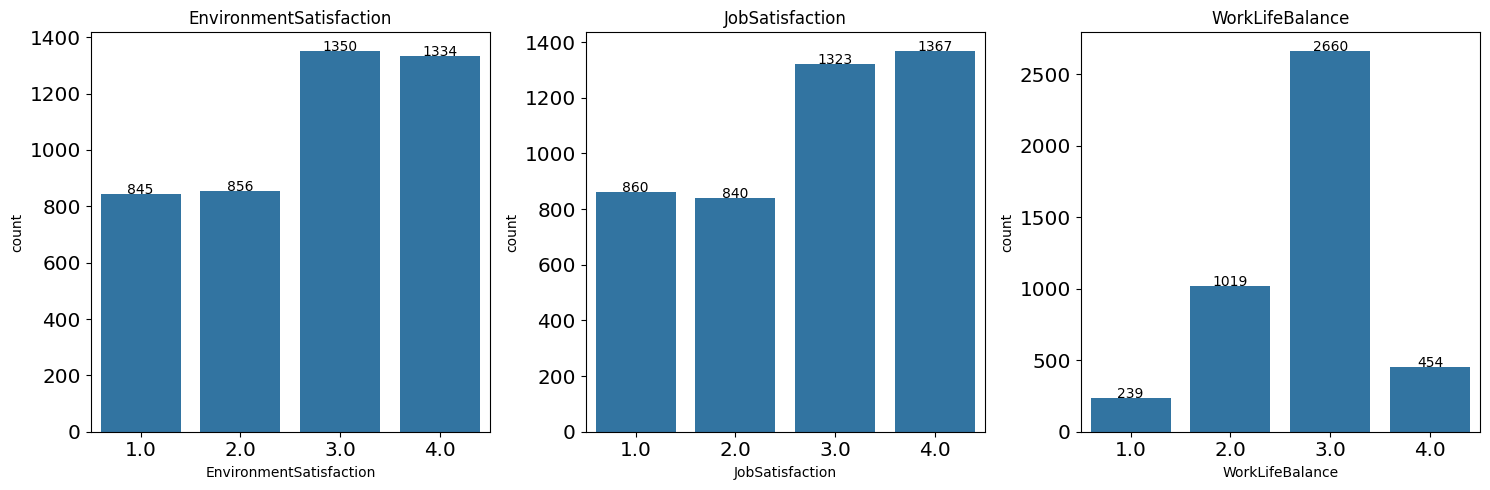

In [ ]:
df_employee_survey_2 = df_employee_survey.copy()
df_employee_survey_2 = df_employee_survey_2.drop(columns='EmployeeID')

plt.figure(figsize=(5 * len(df_employee_survey_2.columns), 5))
for i, column in enumerate(df_employee_survey_2.columns):
  plt.subplot(1, len(df_employee_survey_2.columns), i + 1)
  sns.countplot(x=df_employee_survey_2[column])
  plt.title(column)
  total = len(df_employee_survey_2[column])
  for p in plt.gca().patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.annotate(int(count), (x, y), ha='center')

plt.tight_layout()
plt.show()

## df_manager_survey

In [ ]:
df_manager_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [ ]:
df_manager_survey_2 = df_manager_survey.copy()
df_manager_survey_2 = df_manager_survey_2.drop(columns='EmployeeID')
df_manager_survey_2 = df_manager_survey_2.astype('category')

df_manager_survey_2.describe()

,JobInvolvement,PerformanceRating
count,4410,4410
unique,4,2
top,3,3
freq,2604,3732


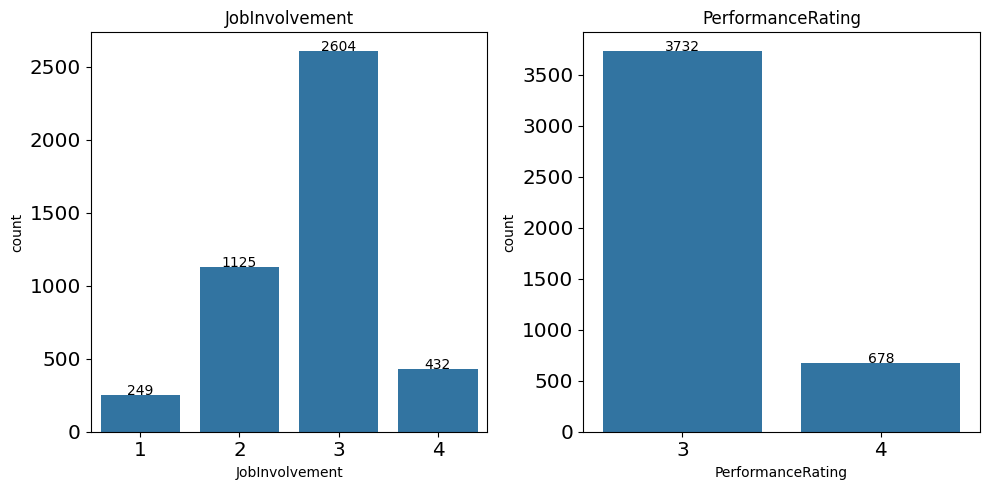

In [ ]:
df_manager_survey_2 = df_manager_survey.copy()
df_manager_survey_2 = df_manager_survey_2.drop(columns='EmployeeID')

plt.figure(figsize=(5 * len(df_manager_survey_2.columns), 5))
for i, column in enumerate(df_manager_survey_2.columns):
  plt.subplot(1, len(df_manager_survey_2.columns), i + 1)
  sns.countplot(x=df_manager_survey_2[column])
  plt.title(column)
  total = len(df_manager_survey_2[column])
  for p in plt.gca().patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.annotate(int(count), (x, y), ha='center')

plt.tight_layout()
plt.show()

## df_in_time

In [ ]:
df_in_time.rename(columns={'Unnamed: 0':'EmployeeID'}, inplace=True)

In [ ]:
df_in_time

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaN,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaN,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaN,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaN,2015-03-27 09:47:30,2

In [ ]:
df_in_time.isna().sum()

,0
EmployeeID,0
2015-01-01,4410
2015-01-02,209
2015-01-05,206
2015-01-06,228
...,...
2015-12-25,4410
2015-12-28,234
2015-12-29,230
2015-12-30,265


In [ ]:
for i in df_in_time:
  df_in_time[i] = df_in_time[i].replace(np.nan, 'Tidak Hadir')

In [ ]:
df_in_time_2 = df_in_time.drop(columns='EmployeeID')

In [ ]:
time_in = []

for i, j in df_in_time_2.iterrows():
  for k in j.values:
    if k == 1:
      continue
    else:
      if k != 'Tidak Hadir':
        time_in.append(k)

In [ ]:
len(time_in)

1041930

## df_out_time

In [ ]:
df_out_time.rename(columns={'Unnamed: 0':'EmployeeID'}, inplace=True)

In [ ]:
for i in df_out_time:
  df_out_time[i] = df_out_time[i].replace(np.nan, 'Tidak Hadir')

In [ ]:
df_out_time_2 = df_out_time.drop(columns='EmployeeID')

In [ ]:
time_out = []

for i, j in df_out_time_2.iterrows():
  for k in j.values:
    if k == 1:
      continue
    else:
      if k != 'Tidak Hadir':
        time_out.append(k)

In [ ]:
len(time_out)

1041930

# Data Preprocessing

## Data Extraction: df_working_hours

In [ ]:
time_pattern = r"\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}"

In [ ]:
df_out_time

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,Tidak Hadir,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,Tidak Hadir,2015-01-15 17:22:13,2015-01-16 17:35:11,Tidak Hadir,2015-01-20 16:37:07,2015-01-21 16:55:24,2015-01-22 16:50:47,2015-01-23 17:00:01,Tidak Hadir,2015-01-27 17:28:22,2015-01-28 17:03:21,2015-01-29 17:18:36,2015-01-30 17:00:25,2015-02-02 16:32:49,2015-02-03 17:35:49,2015-02-04 17:24:56,2015-02-05 17:26:31,2015-02-06 17:21:35,2015-02-09 17:37:50,2015-02-10 17:30:20,2015-02-11 17:30:19,2015-02-12 17:36:42,2015-02-13 16:25:26,2015-02-16 17:50:23,2015-02-17 17:28:06,2015-02-18 18:13:29,Tidak Hadir,2015-02-20 17:44:52,2015-02-23 17:13:27,2015-02-24 17:24:48,2015-02-25 17:27:37,2015-02-26 17:08:36,2015-02-27 17:21:55,2015-03-02 17:29:08,2015-03-03 16:54:12,2015-03-04 17:50:18,Tidak Hadir,2015-03-06 17:44:47,2015-03-09 17:53:05,2015-03-10 16:42:53,2015-03-11 16:58:39,2015-03-12 17:15:39,2015-03-13 17:25:55,Tidak Hadir,2015-03-17 17:00:16,2015-03-18 17:40:13,2015-03-19 17:52:44,2015-03-20 17:47:34,2015-03-23 17:48:18,2015-03-2

In [ ]:
time_in = pd.DataFrame(time_in)
time_out = pd.DataFrame(time_out)

In [ ]:
time_in.rename(columns={0:'time_in'}, inplace=True)
time_out.rename(columns={0:'time_out'}, inplace=True)

In [ ]:
time_in = pd.to_datetime(time_in['time_in'])
time_out = pd.to_datetime(time_out['time_out'])

In [ ]:
time_diff = time_out - time_in

In [ ]:
time_diff = time_diff.dt.total_seconds() / 3600

In [ ]:
time_diff = round(time_diff, 1)

In [ ]:
df_working_hours = df_out_time_2.copy()

In [ ]:
replaced = 0

for i in range(len(df_working_hours)):
  for j in df_working_hours.columns:
    value = df_working_hours.at[i, j]
    if isinstance(value, str) and re.fullmatch(time_pattern, value):
      if replaced < len(time_diff):
        df_working_hours.at[i, j] = time_diff[replaced]
        replaced += 1

In [ ]:
for index in df_working_hours.index:
  for col in df_working_hours.columns:
    if df_working_hours.at[index, col] == 'Tidak Hadir':
      df_working_hours.at[index, col] = 0

In [ ]:
df_working_hours.insert(loc=0, column='EmployeeID', value=df_out_time['EmployeeID'])

In [ ]:
df_working_hours

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,0,7.2,7.2,7.4,7.0,7.3,7.5,7.3,7.8,0,7.3,7.3,0,6.8,7.1,7.1,7.6,0,7.6,7.1,7.4,6.8,6.9,7.2,7.6,7.6,7.5,7.6,7.3,7.2,7.4,7.2,7.6,7.4,7.8,0,7.8,7.4,7.2,7.6,7.2,7.4,7.2,6.8,7.7,0,7.8,7.4,6.9,7.2,7.1,7.3,0,6.9,7.2,7.8,7.2,7.6,7.3,7.4,0,7.6,7.4,7.9,7.3,7.7,7.2,7.0,7.6,7.4,7.8,7.1,7.3,7.1,7.5,7.8,7.3,7.7,7.0,7.5,7.3,7.6,7.2,7.9,7.7,7.5,0,7.4,7.3,7.5,7.1,7.6,0,7.4,7.5,7.9,6.8,0,7.3,7.3,7.5,7.1,7.6,7.2,7.9,7.4,0,0,7.7,7.5,7.0,0,7.1,0,7.1,7.6,7.4,7.6,7.5,7.5,7.5,7.2,7.2,6.9,7.1,7.8,7.1,7.7,7.3,7.7,7.6,7.2,7.9,7.7,7.5,6.9,7.4,7.3,7.1,7.6,7.3,0,7.1,7.3,7.9,6.7,7.5,7.5,6.7,7.1,7.2,7.4,6.9,7.2,7.7,7.5,7.4,7.6,7.5,7.6,7.4,7.1,7.1,7.6,6.9,7.2,7.7,7.5,7.4,7.7,7.7,7.6,7.0,0,7.2,7.4,7.5,7.4,7.3,7.5,7.4,7.3,6.9,7.1,7.3,0,7.5,7.4,7.7,7.0,7.3,7.7,7.6,7.6,7.4,7.8,0,7.0,7.7,7.4,7.5,7.6,7.2,0,7.5,7.6,6.8,7.5,7.0,0,0,7.2,7.7,7.1,7.7,7.1,7.3,6.9,7.6,6.9,7.6,7.0,0,0,0,7.2,7.3,7.8,7.1,7.4,7.0,7.8,7.3,7.6,7.4,7.4,7.1,7.0,7.4,7.6,7.6,7.1,6.9,7.9,7.9,7.2,7.7,7.5,0,7.6,0,0,7.3,7.4,6.5,7.6,0,7.8,7.3,7.8,7.1
1,2,0,8.1,7.5,0,7.4,7.4,7.2,7.6,7.3,0,7.6,7.7,7.6,7.6,7.9,7.4,7.8,0,7.5,7.2,7.3,7.1,7.6,7.6,7.6,7.6,7.9,0,8.0,7.6,8.0,7.7,7.7,7

In [ ]:
df_working_hours_resigned = df_working_hours[df_working_hours['EmployeeID'].isin(df[df['Attrition'] == 1]['EmployeeID'])]
df_working_hours_not_resigned = df_working_hours[df_working_hours['EmployeeID'].isin(df[df['Attrition'] == 0]['EmployeeID'])]

In [ ]:
df_working_hours_resigned = df_working_hours_resigned.drop(columns='EmployeeID')
df_working_hours_not_resigned = df_working_hours_not_resigned.drop(columns='EmployeeID')

In [ ]:
df_working_hours_resigned = df_working_hours_resigned.transpose()
df_working_hours_not_resigned = df_working_hours_not_resigned.transpose()

In [ ]:
df_working_hours_not_resigned['mean'] = df_working_hours_not_resigned.mean(axis=1)
df_working_hours_resigned['mean'] = df_working_hours_resigned.mean(axis=1)

In [ ]:
df_working_hours_resigned = df_working_hours_resigned[df_working_hours_resigned['mean'] != 0]
df_working_hours_not_resigned = df_working_hours_not_resigned[df_working_hours_not_resigned['mean'] != 0]

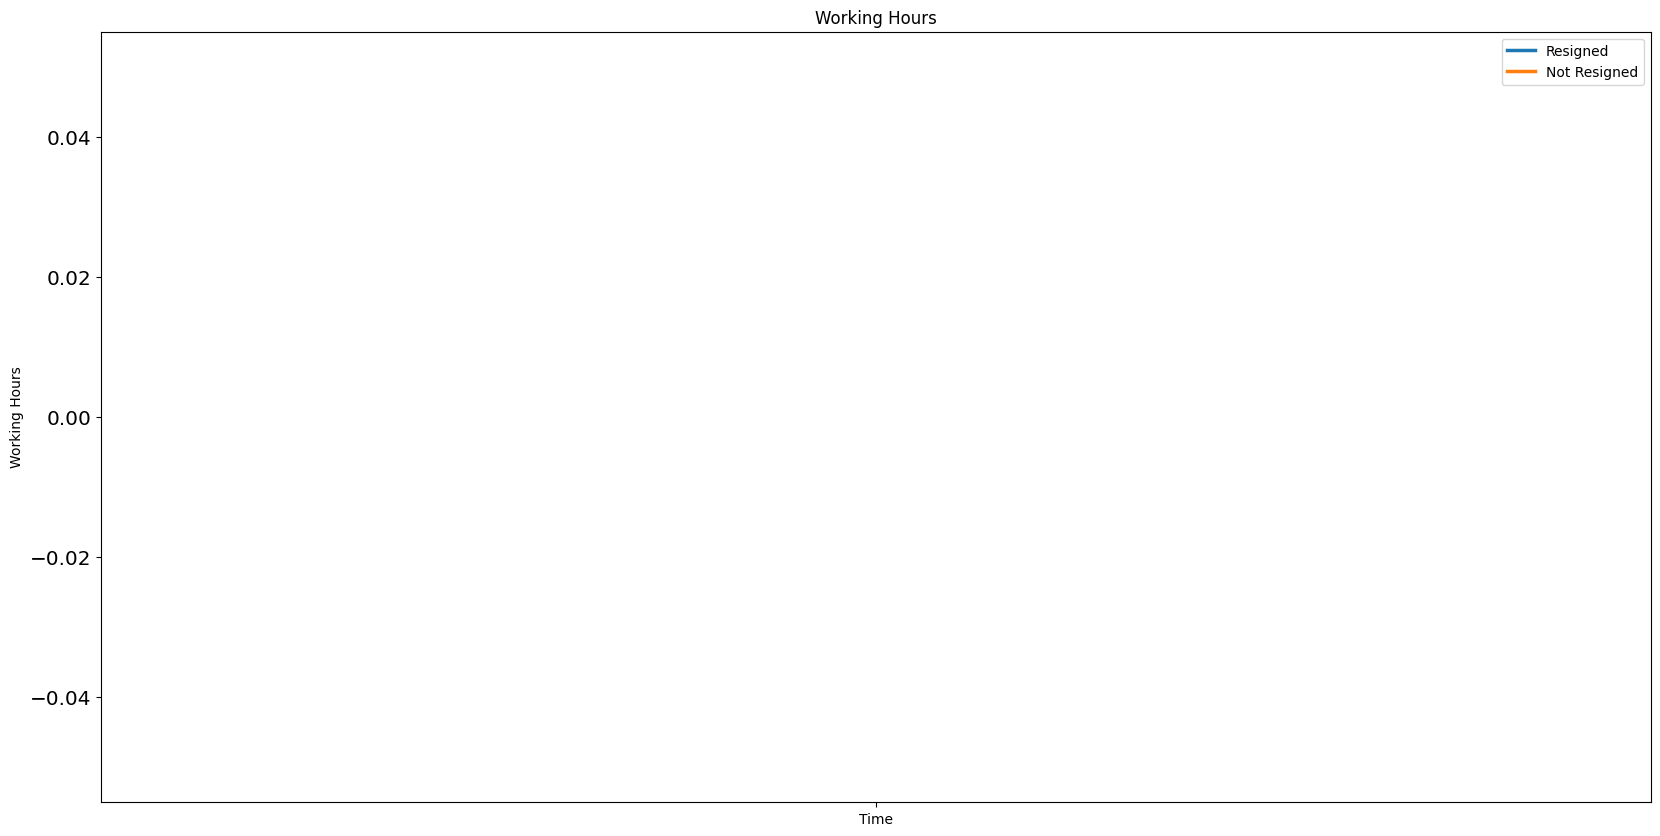

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(df_working_hours_resigned.index, df_working_hours_resigned['mean'], label='Resigned')
plt.plot(df_working_hours_not_resigned.index, df_working_hours_not_resigned['mean'], label='Not Resigned')
plt.xlabel('Time')
plt.ylabel('Working Hours')
plt.title('Working Hours')
plt.xticks(visible=False)
plt.legend()
plt.show()

## Working Hours per Month

In [ ]:
df_working_hours_2 = df_working_hours.copy()
df_working_hours_2_resigned = df_working_hours_2[df_working_hours_2['EmployeeID'].isin(df[df['Attrition'] == 1]['EmployeeID'])]
df_working_hours_2_not_resigned = df_working_hours_2[df_working_hours_2['EmployeeID'].isin(df[df['Attrition'] == 0]['EmployeeID'])]

In [ ]:
# df_working_hours_2 = df_working_hours_2.drop(columns='EmployeeID')
# df_working_hours_2
df_working_hours_2_resigned = df_working_hours_2_resigned.drop(columns='EmployeeID')
df_working_hours_2_not_resigned = df_working_hours_2_not_resigned.drop(columns='EmployeeID')

In [ ]:
# df_working_hours_2 = df_working_hours_2.transpose()
# df_working_hours_2
df_working_hours_2_resigned = df_working_hours_2_resigned.transpose()
df_working_hours_2_not_resigned = df_working_hours_2_not_resigned.transpose()

In [ ]:
df_working_hours_2_resigned['total_working_hours'] = df_working_hours_2_resigned.sum(axis=1)
df_working_hours_2_not_resigned['total_working_hours'] = df_working_hours_2_not_resigned.sum(axis=1)

In [ ]:
# df_working_hours_2.insert(loc=0, column='Date', value=df_in_time_2.columns)
# df_working_hours_2.reset_index(drop=True, inplace=True)
# df_working_hours_2
df_working_hours_2_resigned.insert(loc=0, column='Date', value=df_in_time_2.columns)
df_working_hours_2_resigned.reset_index(drop=True, inplace=True)
df_working_hours_2_not_resigned.insert(loc=0, column='Date', value=df_in_time_2.columns)
df_working_hours_2_not_resigned.reset_index(drop=True, inplace=True)

In [ ]:
# df_working_hours_2['Date'] = pd.to_datetime(df_working_hours_2['Date'])
df_working_hours_2_resigned['Date'] = pd.to_datetime(df_working_hours_2_resigned['Date'])
df_working_hours_2_not_resigned['Date'] = pd.to_datetime(df_working_hours_2_not_resigned['Date'])

In [ ]:
df_working_hours_2_resigned = df_working_hours_2_resigned[df_working_hours_2_resigned['total_working_hours'] != 0]
df_working_hours_2_not_resigned = df_working_hours_2_not_resigned[df_working_hours_2_not_resigned['total_working_hours'] != 0]

In [ ]:
monthly_working_hours_leave = df_working_hours_2_resigned.groupby(df_working_hours_2_resigned['Date'].dt.month)['total_working_hours'].mean()
monthly_working_hours_stay = df_working_hours_2_not_resigned.groupby(df_working_hours_2_not_resigned['Date'].dt.month)['total_working_hours'].mean()

In [ ]:
monthly_working_hours_stay = pd.DataFrame(monthly_working_hours_stay)
monthly_working_hours_leave = pd.DataFrame(monthly_working_hours_leave)
monthly_working_hours_stay.reset_index(inplace=True)
monthly_working_hours_leave.reset_index(inplace=True)

In [ ]:
monthly_working_hours_stay.rename(columns={'Date':'Month'}, inplace=True)
monthly_working_hours_leave.rename(columns={'Date':'Month'}, inplace=True)

In [ ]:
monthly_working_hours_stay['total_working_hours'] = monthly_working_hours_stay['total_working_hours']/len(df_working_hours_2_not_resigned.transpose()[1:-1])
monthly_working_hours_leave['total_working_hours'] = monthly_working_hours_leave['total_working_hours']/len(df_working_hours_2_resigned.transpose()[1:-1])

In [ ]:
monthly_working_hours_leave['total_working_hours'].sum()

95.01577176009111

In [ ]:
monthly_working_hours_stay['total_working_hours'].sum()

86.377653365947

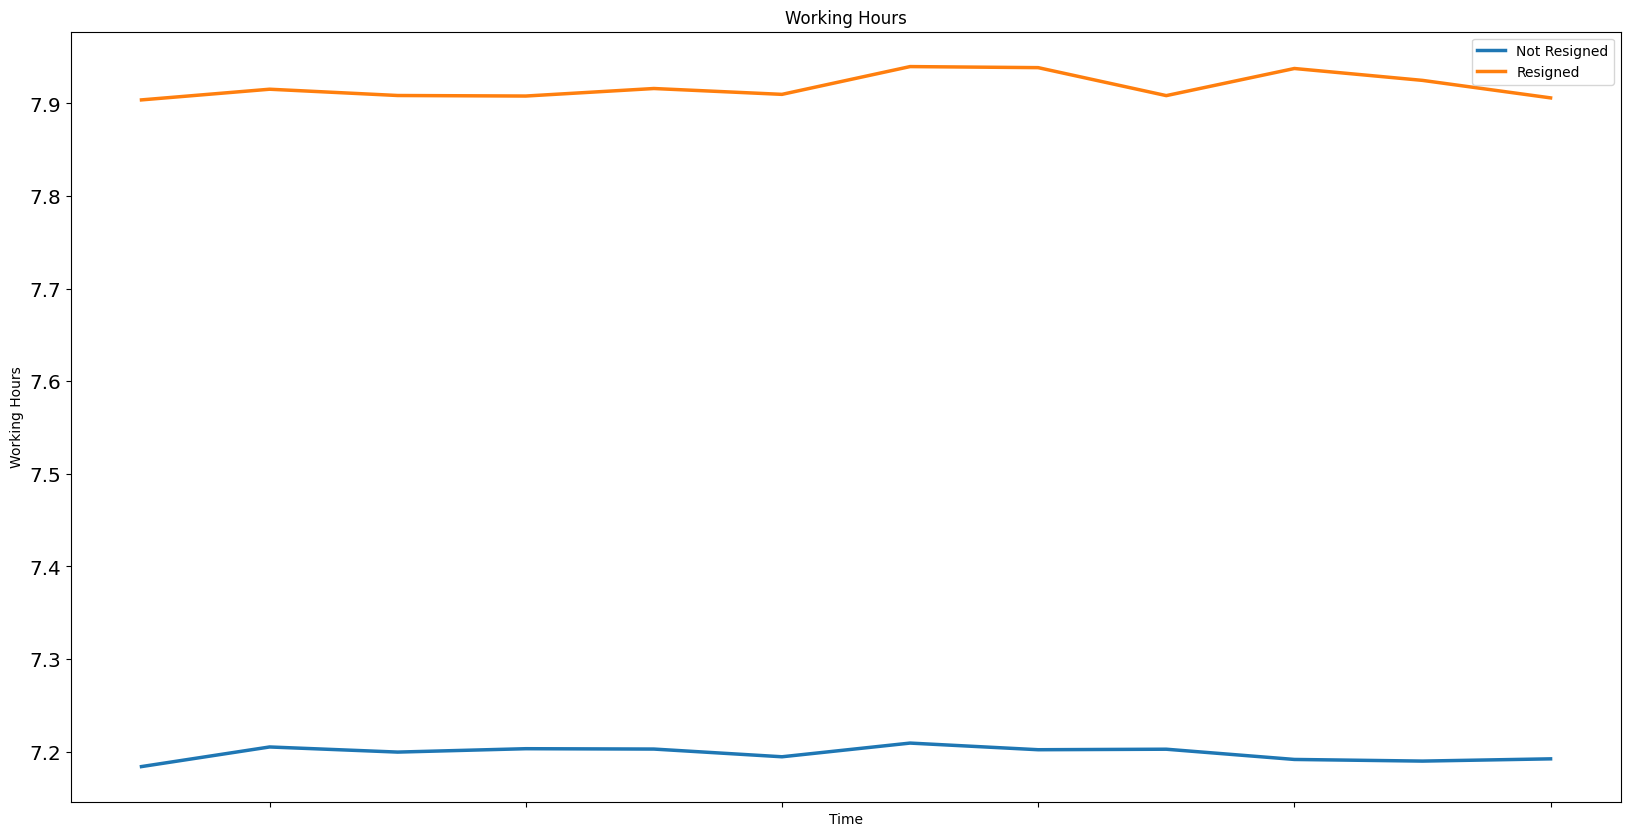

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(monthly_working_hours_stay['Month'], monthly_working_hours_stay['total_working_hours'], label='Not Resigned')
plt.plot(monthly_working_hours_leave['Month'], monthly_working_hours_leave['total_working_hours'], label='Resigned')
plt.xlabel('Time')
plt.ylabel('Working Hours')
plt.title('Working Hours')
plt.xticks(visible=False)
plt.legend()
plt.show()

## Data Handling

df <br>
df_employee_survey <br>
df_manager_survey <br>
df_working_hours

### df

#### Duplicates

In [ ]:
df.duplicated().sum()

np.int64(0)

#### Missing Data

In [ ]:
for i in df:
  missing = df[i].isna().sum()
  proportion = missing / len(df) * 100
  print(f'{i}: {missing} ({proportion:.2f}%)')

Age: 0 (0.00%)
Attrition: 0 (0.00%)
BusinessTravel: 0 (0.00%)
Department: 0 (0.00%)
DistanceFromHome: 0 (0.00%)
Education: 0 (0.00%)
EducationField: 0 (0.00%)
EmployeeCount: 0 (0.00%)
EmployeeID: 0 (0.00%)
Gender: 0 (0.00%)
JobLevel: 0 (0.00%)
JobRole: 0 (0.00%)
MaritalStatus: 0 (0.00%)
MonthlyIncome: 0 (0.00%)
NumCompaniesWorked: 19 (0.43%)
Over18: 0 (0.00%)
PercentSalaryHike: 0 (0.00%)
StandardHours: 0 (0.00%)
StockOptionLevel: 0 (0.00%)
TotalWorkingYears: 9 (0.20%)
TrainingTimesLastYear: 0 (0.00%)
YearsAtCompany: 0 (0.00%)
YearsSinceLastPromotion: 0 (0.00%)
YearsWithCurrManager: 0 (0.00%)


In [ ]:
# imputation
df['NumCompaniesWorked'].fillna(df['NumCompaniesWorked'].median(), inplace=True)
df['TotalWorkingYears'].fillna(df['TotalWorkingYears'].median(), inplace=True)

#### Ouliers

In [ ]:
# iqr cleaning for num columns
for column in num_columns:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  #print(f'{column}: {lower_bound} - {upper_bound}')

In [ ]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,2,Sales Executive,Single,58130,2.0,Y,20,8,1,5.0,2,0,0,0
7,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,Male,2,Sales Executive,Married,31430,2.0,Y,22,8,3,10.0,2,0,0,0
9,25,No,Non-Travel,Research & Development,7,4,Medical,1,10,Female,4,Laboratory Technician,Divorced,134640,1.0,Y,13,8,1,6.0,2,6,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,45,No,Travel_Frequently,Sales,21,1,Marketing,1,4402,Male,3,Research Scientist,Married,22890,4.0,Y,13,8,0,9.0,3,3,0,2
4402,37,Yes,Travel_Frequently,Sales,2,3,Marketing,1,4403,Male,1,Laboratory Technician,Divorced,40010,6.0,Y,11,8,1,17.0,2,1,0,0
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,2,Human Resources,Single,35390,1.0,Y,18,8,0,6.0,2,6,1,5
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2


#### Scaling

In [ ]:
# log scaling
for column in num_columns:
  df[column] = np.log1p(df[column])


In [ ]:
df[num_columns].head()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1,3.465736,2.397895,10.642826,0.000000,3.178054,1.945910,1.386294,1.791759,0.693147,1.609438
4,3.496508,2.397895,10.061388,1.609438,2.564949,2.302585,1.098612,1.945910,0.000000,1.609438
6,3.367296,2.484907,10.970454,1.098612,3.044522,1.791759,1.098612,0.000000,0.000000,0.000000
7,3.401197,2.944439,10.355550,1.098612,3.135494,2.397895,1.098612,0.000000,0.000000,0.000000
9,3.258097,2.079442,11.810367,0.693147,2.639057,1.945910,1.098612,1.945910,0.693147,1.791759


#### Encoding

In [ ]:
ohe_columns = []

for column_name in cat_columns:
  if df[column_name].nunique() > 2:
    ohe_columns.append(column_name)

biner_columns = cat_columns[~cat_columns.isin(ohe_columns)]

In [ ]:
ohe_columns.remove('Education')
ohe_columns.remove('JobLevel')
ohe_columns.remove('StockOptionLevel')

In [ ]:
ohe_columns

['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

In [ ]:
biner_columns

Index(['Attrition', 'EmployeeCount', 'Gender', 'Over18', 'StandardHours'], dtype='object')

In [ ]:
# encoding
for column_name in ohe_columns:
  df[column_name] = df[column_name].astype('category')
  df[column_name] = df[column_name].cat.codes

df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1,3.465736,Yes,1,1,2.397895,1,1,1,2,Female,1,6,2,10.642826,0.000000,Y,3.178054,8,1,1.945910,1.386294,1.791759,0.693147,1.609438
4,3.496508,No,2,1,2.397895,1,3,1,5,Male,1,7,2,10.061388,1.609438,Y,2.564949,8,2,2.302585,1.098612,1.945910,0.000000,1.609438
6,3.367296,Yes,2,1,2.484907,2,3,1,7,Male,2,7,2,10.970454,1.098612,Y,3.044522,8,1,1.791759,1.098612,0.000000,0.000000,0.000000
7,3.401197,No,2,1,2.944439,3,1,1,8,Male,2,7,1,10.355550,1.098612,Y,3.135494,8,3,2.397895,1.098612,0.000000,0.000000,0.000000
9,3.258097,No,0,1,2.079442,4,3,1,10,Female,4,2,0,11.810367,0.693147,Y,2.639057,8,1,1.945910,1.098612,1.945910,0.693147,1.791759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,3.828641,No,1,2,3.091042,1,2,1,4402,Male,3,6,1,10.038499,1.609438,Y,2.639057,8,0,2.302585,1.386294,1.386294,0.000000,1.098612
4402,3.637586,Yes,1,2,1.098612,3,2,1,4403,Male,1,2,0,10.596910,1.945910,Y,2.484907,8,1,2.890372,1.098612,0.693147,0.000000,0.000000
4404,3.401197,No,2,2,1.609438,3,4,1,4405,Female,2,1,2,10.474213,0.693147,Y,2.944439,8,0,1.945910,1.098612,1.945910,0.693147,1.791759
4406,3.401197,No,2,1,1.098612,4,3,1,4407,Male,1,2,0,10.195821,1.098612,Y,2.772589,8,0,2.397895,1.098612,1.386294,0.000000,1.098612


In [ ]:
# encoding
for column_name in biner_columns:
  df[column_name] = df[column_name].astype('category')
  df[column_name] = df[column_name].cat.codes

df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1,3.465736,1,1,1,2.397895,1,1,0,2,0,1,6,2,10.642826,0.000000,0,3.178054,0,1,1.945910,1.386294,1.791759,0.693147,1.609438
4,3.496508,0,2,1,2.397895,1,3,0,5,1,1,7,2,10.061388,1.609438,0,2.564949,0,2,2.302585,1.098612,1.945910,0.000000,1.609438
6,3.367296,1,2,1,2.484907,2,3,0,7,1,2,7,2,10.970454,1.098612,0,3.044522,0,1,1.791759,1.098612,0.000000,0.000000,0.000000
7,3.401197,0,2,1,2.944439,3,1,0,8,1,2,7,1,10.355550,1.098612,0,3.135494,0,3,2.397895,1.098612,0.000000,0.000000,0.000000
9,3.258097,0,0,1,2.079442,4,3,0,10,0,4,2,0,11.810367,0.693147,0,2.639057,0,1,1.945910,1.098612,1.945910,0.693147,1.791759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,3.828641,0,1,2,3.091042,1,2,0,4402,1,3,6,1,10.038499,1.609438,0,2.639057,0,0,2.302585,1.386294,1.386294,0.000000,1.098612
4402,3.637586,1,1,2,1.098612,3,2,0,4403,1,1,2,0,10.596910,1.945910,0,2.484907,0,1,2.890372,1.098612,0.693147,0.000000,0.000000
4404,3.401197,0,2,2,1.609438,3,4,0,4405,0,2,1,2,10.474213,0.693147,0,2.944439,0,0,1.945910,1.098612,1.945910,0.693147,1.791759
4406,3.401197,0,2,1,1.098612,4,3,0,4407,1,1,2,0,10.195821,1.098612,0,2.772589,0,0,2.397895,1.098612,1.386294,0.000000,1.098612


In [ ]:
df.to_csv('/content/drive/MyDrive/Kerja/Rakamin Bootcamp/Final Project/Dataset/final_general_df.csv', index=False)

In [ ]:
df.to_csv('final_general_df.csv', index=False)

### df_employee_survey

#### Duplicates

In [ ]:
df.duplicated().sum()

np.int64(0)

#### Missing Data

In [ ]:
df_employee_survey = pd.read_csv('/content/drive/MyDrive/Kerja/Rakamin Bootcamp/Final Project/Dataset/employee_survey_data.csv')

In [ ]:
for i in df_employee_survey:
  missing = df_employee_survey[i].isna().sum()
  proportion = missing / len(df_employee_survey) * 100
  print(f'{i}: {missing} ({proportion:.2f}%)')

EmployeeID: 0 (0.00%)
EnvironmentSatisfaction: 25 (0.57%)
JobSatisfaction: 20 (0.45%)
WorkLifeBalance: 38 (0.86%)


In [ ]:
# filling na with mode
df_employee_survey['EnvironmentSatisfaction'].fillna(df_employee_survey['EnvironmentSatisfaction'].mode()[0], inplace=True)
df_employee_survey['JobSatisfaction'].fillna(df_employee_survey['JobSatisfaction'].mode()[0], inplace=True)
df_employee_survey['WorkLifeBalance'].fillna(df_employee_survey['WorkLifeBalance'].mode()[0], inplace=True)

### df_manager_survey

#### Duplicates

In [ ]:
df_manager_survey.duplicated().sum()

np.int64(0)

#### Missing Data

In [ ]:
for i in df_manager_survey:
  missing = df_manager_survey[i].isna().sum()
  proportion = missing / len(df_manager_survey) * 100
  print(f'{i}: {missing} ({proportion:.2f}%)')

EmployeeID: 0 (0.00%)
JobInvolvement: 0 (0.00%)
PerformanceRating: 0 (0.00%)


## Data Merge

In [ ]:
df_working_hours_2 = df_working_hours.copy()
df_working_hours_2 = df_working_hours_2.drop(columns='EmployeeID')
df_working_hours_2['Average_Working_Hours'] = df_working_hours_2.mean(axis=1)
df_working_hours_2.insert(loc=0, column='EmployeeID', value=df_out_time['EmployeeID'])
df_working_hours_2

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31,Average_Working_Hours
0,1,0,7.2,7.2,7.4,7.0,7.3,7.5,7.3,7.8,0,7.3,7.3,0,6.8,7.1,7.1,7.6,0,7.6,7.1,7.4,6.8,6.9,7.2,7.6,7.6,7.5,7.6,7.3,7.2,7.4,7.2,7.6,7.4,7.8,0,7.8,7.4,7.2,7.6,7.2,7.4,7.2,6.8,7.7,0,7.8,7.4,6.9,7.2,7.1,7.3,0,6.9,7.2,7.8,7.2,7.6,7.3,7.4,0,7.6,7.4,7.9,7.3,7.7,7.2,7.0,7.6,7.4,7.8,7.1,7.3,7.1,7.5,7.8,7.3,7.7,7.0,7.5,7.3,7.6,7.2,7.9,7.7,7.5,0,7.4,7.3,7.5,7.1,7.6,0,7.4,7.5,7.9,6.8,0,7.3,7.3,7.5,7.1,7.6,7.2,7.9,7.4,0,0,7.7,7.5,7.0,0,7.1,0,7.1,7.6,7.4,7.6,7.5,7.5,7.5,7.2,7.2,6.9,7.1,7.8,7.1,7.7,7.3,7.7,7.6,7.2,7.9,7.7,7.5,6.9,7.4,7.3,7.1,7.6,7.3,0,7.1,7.3,7.9,6.7,7.5,7.5,6.7,7.1,7.2,7.4,6.9,7.2,7.7,7.5,7.4,7.6,7.5,7.6,7.4,7.1,7.1,7.6,6.9,7.2,7.7,7.5,7.4,7.7,7.7,7.6,7.0,0,7.2,7.4,7.5,7.4,7.3,7.5,7.4,7.3,6.9,7.1,7.3,0,7.5,7.4,7.7,7.0,7.3,7.7,7.6,7.6,7.4,7.8,0,7.0,7.7,7.4,7.5,7.6,7.2,0,7.5,7.6,6.8,7.5,7.0,0,0,7.2,7.7,7.1,7.7,7.1,7.3,6.9,7.6,6.9,7.6,7.0,0,0,0,7.2,7.3,7.8,7.1,7.4,7.0,7.8,7.3,7.6,7.4,7.4,7.1,7.0,7.4,7.6,7.6,7.1,6.9,7.9,7.9,7.2,7.7,7.5,0,7.6,0,0,7.3,7.4,6.5,7.6,0,7.8,7.3,7.8,7.1,6.55249
1,2,0,8.1,7.5,0,7.4,7.4,7.2,7.6,7.3,0,7.6,7.7,7.6,7.6,7.9,7.4,7.8,0,7.5,7.2,7.3,7.1,7.6,7.6,7.6,7

In [ ]:
all_df = pd.merge(df, df_employee_survey, on='EmployeeID', how='left')
all_df = pd.merge(all_df, df_manager_survey, on='EmployeeID', how='left')
all_df['Average_Working_Hours'] = df_working_hours_2['Average_Working_Hours']
all_df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Average_Working_Hours
0,3.465736,1,1,1,2.397895,1,1,0,2,0,1,6,2,10.642826,0.000000,0,3.178054,0,1,1.945910,1.386294,1.791759,0.693147,1.609438,3.0,2.0,4.0,2,4,6.55249
1,3.496508,0,2,1,2.397895,1,3,0,5,1,1,7,2,10.061388,1.609438,0,2.564949,0,2,2.302585,1.098612,1.945910,0.000000,1.609438,4.0,1.0,3.0,3,3,6.979693
2,3.367296,1,2,1,2.484907,2,3,0,7,1,2,7,2,10.970454,1.098612,0,3.044522,0,1,1.791759,1.098612,0.000000,0.000000,0.000000,1.0,3.0,1.0,3,4,6.500766
3,3.401197,0,2,1,2.944439,3,1,0,8,1,2,7,1,10.355550,1.098612,0,3.135494,0,3,2.397895,1.098612,0.000000,0.000000,0.000000,1.0,2.0,3.0,3,4,6.478161
4,3.258097,0,0,1,2.079442,4,3,0,10,0,4,2,0,11.810367,0.693147,0,2.639057,0,1,1.945910,1.098612,1.945910,0.693147,1.791759,2.0,1.0,3.0,3,3,7.515326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,3.828641,0,1,2,3.091042,1,2,0,4402,1,3,6,1,10.038499,1.609438,0,2.639057,0,0,2.302585,1.386294,1.386294,0.000000,1.098612,1.0,3.0,3.0,2,3,8.624904
2645,3.637586,1,1,2,1.098612,3,2,0,4403,1,1,2,0,10.596910,1.945910,0,2.484907,0,1,2.890372,1.098612,0.693147,0.000000,0.000000,1.0,3.0,3.0,3,3,7.141762
2646,3.401197,0,2,2,1.609438,3,4,0,4405,0,2,1,2,10.474213,0.693147,0,2.944439,0,0,1.945910,1.098612,1.945910,0.693147,1.791759,3.0,4.0,3.0,2,3,6.343295
2647,3.401197,0,2,1,1.098612,4,3,0,4407,1,1,2,0,10.195821,1.098612,0,2.772589,0,0,2.397895,1.098612,1.386294,0.000000,1.098612,4.0,4.0,3.0,2,3,10.149042


In [ ]:
all_df.groupby('Attrition')['EmployeeID'].count()

,EmployeeID
Attrition,
0,2196
1,453


## Data Balancing

In [ ]:
# over sampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(all_df.drop(columns=['EmployeeID', 'Attrition']), all_df['Attrition'])

In [ ]:
x_resampled = pd.DataFrame(X_resampled)
y_resampled = pd.DataFrame(y_resampled)

In [ ]:
x_resampled

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Average_Working_Hours
0,3.465736,1,1,2.397895,1,1,0,0,1,6,2,10.642826,0.000000,0,3.178054,0,1,1.945910,1.386294,1.791759,0.693147,1.609438,3.000000,2.000000,4.000000,2,4,6.55249
1,3.496508,2,1,2.397895,1,3,0,1,1,7,2,10.061388,1.609438,0,2.564949,0,2,2.302585,1.098612,1.945910,0.000000,1.609438,4.000000,1.000000,3.000000,3,3,6.979693
2,3.367296,2,1,2.484907,2,3,0,1,2,7,2,10.970454,1.098612,0,3.044522,0,1,1.791759,1.098612,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,3,4,6.500766
3,3.401197,2,1,2.944439,3,1,0,1,2,7,1,10.355550,1.098612,0,3.135494,0,3,2.397895,1.098612,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,3,4,6.478161
4,3.258097,0,1,2.079442,4,3,0,0,4,2,0,11.810367,0.693147,0,2.639057,0,1,1.945910,1.098612,1.945910,0.693147,1.791759,2.000000,1.000000,3.000000,3,3,7.515326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,3.494332,1,1,3.284499,2,3,0,0,2,5,1,11.356684,1.906339,0,2.648500,0,2,2.409708,1.365952,0.049014,0.000000,0.000000,1.000000,2.070712,3.000000,2,3,6.49749
4388,3.321134,1,1,2.271735,2,3,0,1,2,6,0,11.457017,0.430287,0,2.835649,0,1,1.386294,1.207709,1.277198,0.262860,0.681989,3.379227,3.620773,2.620773,3,3,7.032503
4389,3.284987,1,1,1.030238,3,3,0,1,2,5,0,10.551052,0.878409,0,3.083198,0,0,2.095538,1.386294,1.803028,0.761522,1.098612,1.168632,2.662735,3.000000,3,4,6.322429
4390,3.337266,1,1,2.505460,2,1,0,0,1,2,2,10.866204,0.693147,0,2.935732,0,0,0.583856,1.340934,0.583856,0.583856,0.000000,4.000000,3.842326,2.000000,2,3,5.446925


## Features Selection

In [ ]:
one_value_columns = x_resampled.columns[x_resampled.nunique() == 1]
x_resampled.drop(columns=one_value_columns, inplace=True)

In [ ]:
features = x_resampled
target = y_resampled

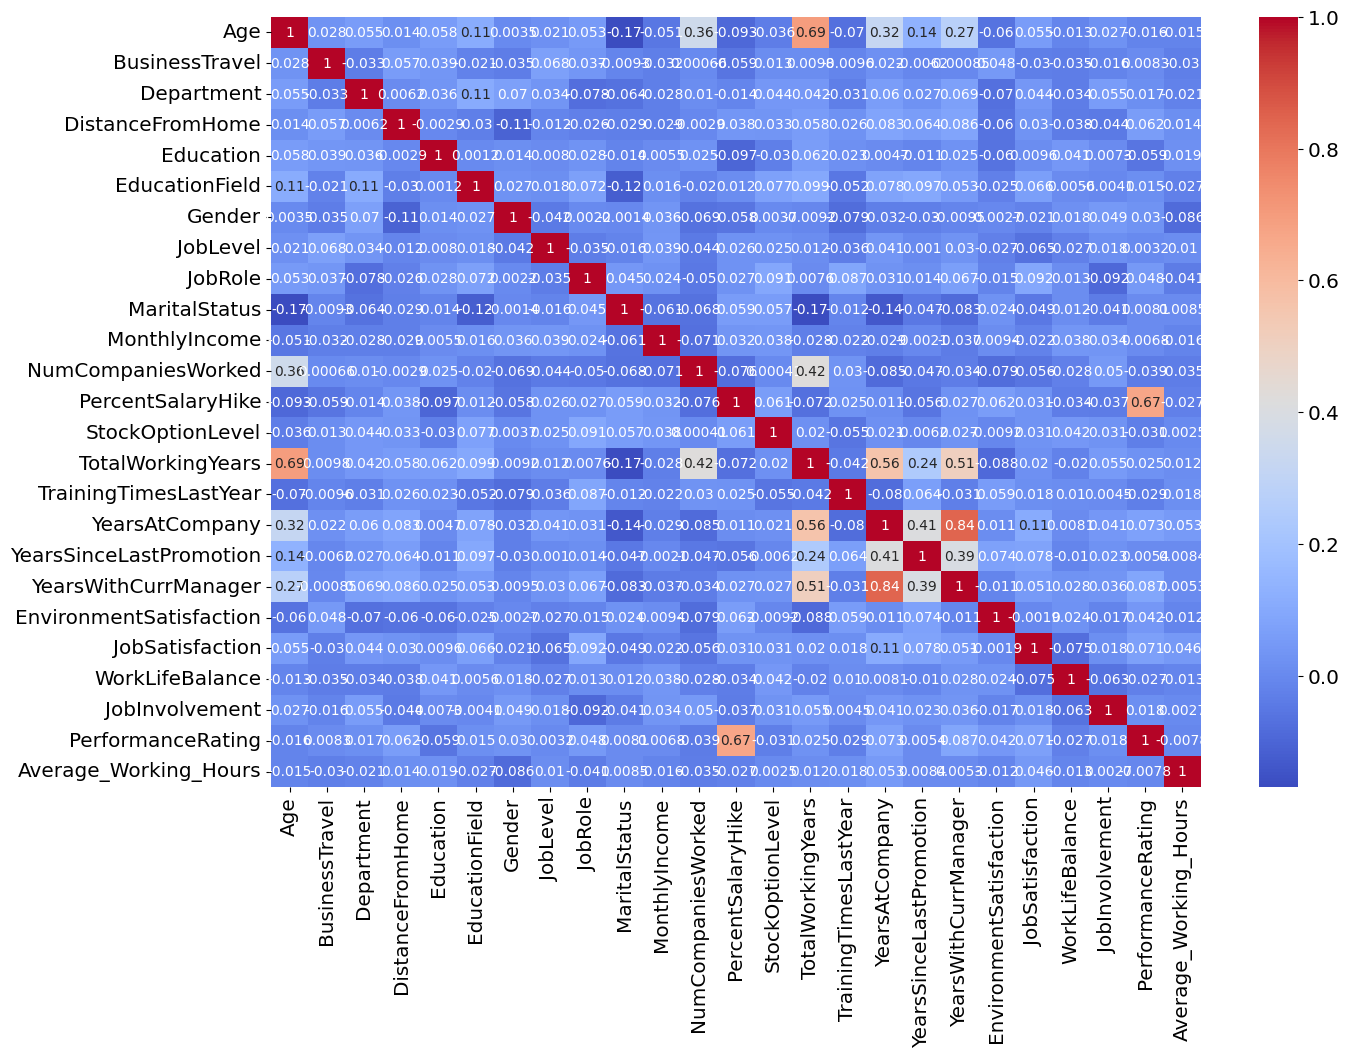

In [ ]:
# correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(features.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
corr_matrix = features.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] >= 0.5)]

to_drop

['TotalWorkingYears',
 'YearsAtCompany',
 'YearsWithCurrManager',
 'PerformanceRating']

In [ ]:
features.drop(columns=to_drop, inplace=True)

In [ ]:
features

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,Average_Working_Hours
0,3.465736,1,1,2.397895,1,1,0,1,6,2,10.642826,0.000000,3.178054,1,1.386294,0.693147,3.000000,2.000000,4.000000,2,6.55249
1,3.496508,2,1,2.397895,1,3,1,1,7,2,10.061388,1.609438,2.564949,2,1.098612,0.000000,4.000000,1.000000,3.000000,3,6.979693
2,3.367296,2,1,2.484907,2,3,1,2,7,2,10.970454,1.098612,3.044522,1,1.098612,0.000000,1.000000,3.000000,1.000000,3,6.500766
3,3.401197,2,1,2.944439,3,1,1,2,7,1,10.355550,1.098612,3.135494,3,1.098612,0.000000,1.000000,2.000000,3.000000,3,6.478161
4,3.258097,0,1,2.079442,4,3,0,4,2,0,11.810367,0.693147,2.639057,1,1.098612,0.693147,2.000000,1.000000,3.000000,3,7.515326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,3.494332,1,1,3.284499,2,3,0,2,5,1,11.356684,1.906339,2.648500,2,1.365952,0.000000,1.000000,2.070712,3.000000,2,6.49749
4388,3.321134,1,1,2.271735,2,3,1,2,6,0,11.457017,0.430287,2.835649,1,1.207709,0.262860,3.379227,3.620773,2.620773,3,7.032503
4389,3.284987,1,1,1.030238,3,3,1,2,5,0,10.551052,0.878409,3.083198,0,1.386294,0.761522,1.168632,2.662735,3.000000,3,6.322429
4390,3.337266,1,1,2.505460,2,1,0,1,2,2,10.866204,0.693147,2.935732,0,1.340934,0.583856,4.000000,3.842326,2.000000,2,5.446925


In [ ]:
target

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
4387,1
4388,1
4389,1
4390,1


In [ ]:
features.to_csv('features.csv', index=False)
target.to_csv('target.csv', index=False)